<a href="https://colab.research.google.com/github/luiz826/Neural_Network/blob/main/Classifica%C3%A7%C3%A3o_de_Tumores_utilizando_Redes_Neurais_e_a_biblioteca_TensorFlow_2_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Classificação de Tumores utilizando Redes Neurais e a biblioteca TensorFlow 2.X</center></h1>

<img src="https://images.unsplash.com/photo-1590859808308-3d2d9c515b1a?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=1053&q=80">

<p1><center>photo by Uriel SC, on Unsplash</center></p1>

### Importação de bibliotecas e carregamento dos dados

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
tf.__version__

'2.4.1'

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dados_formatados.csv", sep=";", header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1095.0000,0.9053,8589.0,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3398.0,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4585.0,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1156.0000,3445.0,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,0.7572,0.7813,5438.0,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    int64  
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

### Pré-processamento dos dados

In [ ]:
X = df.drop(columns=[0,1])
y = df[1]

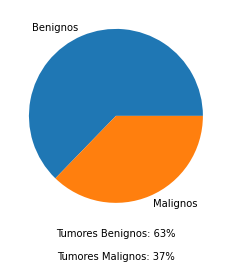

In [ ]:
y.value_counts(normalize=True).plot(kind="pie", labels=["Benignos", "Malignos"])
plt.ylabel("")

plt.xlabel("Tumores Benignos: "+ str(round(y.value_counts(normalize=True).values[0]*100)) +"%" +
           "\n\nTumores Malignos: "+ str(round(y.value_counts(normalize=True).values[1]*100)) +"%")
plt.show()

In [ ]:
X.shape

(569, 30)

In [ ]:
def normaliza(col: np.array):
    '''
    col -> nome da coluna 

    return -> coluna normalizada 
    '''
    colMax = col.max()
    colMin = col.min()

    new_col = (col - colMin) / (colMax - colMin)

    return new_col

In [ ]:
for i in X.columns:
    X[i] = normaliza(X[i].values)

In [ ]:
X = X.values
y = y.values.reshape(-1, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=12)

In [ ]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (455, 30)
y_train shape:  (455, 1)
X_test shape:  (114, 30)
y_test shape:  (114, 1)


### Modelo

obs: Após alguns testes, percebi que o modelo chegava a métricas diferentes com os mesmos hiperparametros. Por isso decidi guardar os resultados em listas e tirar uma média aritmética dos resultados após 10 execuções.

In [ ]:
media_loss_test = []
media_acc_test = []
media_loss_train = []
media_acc_train = []

for i in range(10):
    model = tf.keras.models.Sequential([
                                        tf.keras.layers.Dense(units= 128, activation="relu", input_shape=(X.shape[1], )), 

                                        tf.keras.layers.Dense(units= 64, activation="relu"),
                                                                                                                                              
                                        tf.keras.layers.Dense(units= 2, activation="sigmoid")
    ])

    adam = tf.optimizers.Adam(learning_rate=0.005)
    model.compile(optimizer=adam, loss="sparse_categorical_crossentropy", metrics="sparse_categorical_accuracy")

    if i == 9:
        print("Ultimo modelo sendo treinado:\n")
        model.fit(X_train, y_train, epochs=20, batch_size=20, verbose=1)    
    else:
        model.fit(X_train, y_train, epochs=20, batch_size=20, verbose=0)

    loss_test , acc_test = model.evaluate(X_test, y_test, verbose=0)

    loss_train , acc_train = model.evaluate(X_train, y_train, verbose=0)

    media_loss_test.append(loss_test)
    media_acc_test.append(acc_test)

    media_loss_train.append(loss_train)
    media_acc_train.append(acc_train)
    
print("\n\nAs configurações do modelo usado: \n")
model.summary()

Ultimo modelo sendo treinado:

Epoch 1/20
23/23 [==============================] - 0s 1ms/step - loss: 0.5999 - sparse_categorical_accuracy: 0.7125
Epoch 2/20
23/23 [==============================] - 0s 1ms/step - loss: 0.2453 - sparse_categorical_accuracy: 0.8782
Epoch 3/20
23/23 [==============================] - 0s 1ms/step - loss: 0.1770 - sparse_categorical_accuracy: 0.9352
Epoch 4/20
23/23 [==============================] - 0s 1ms/step - loss: 0.1480 - sparse_categorical_accuracy: 0.9220
Epoch 5/20
23/23 [==============================] - 0s 2ms/step - loss: 0.1466 - sparse_categorical_accuracy: 0.9320
Epoch 6/20
23/23 [==============================] - 0s 1ms/step - loss: 0.1084 - sparse_categorical_accuracy: 0.9691
Epoch 7/20
23/23 [==============================] - 0s 1ms/step - loss: 0.1091 - sparse_categorical_accuracy: 0.9695
Epoch 8/20
23/23 [==============================] - 0s 1ms/step - loss: 0.0764 - sparse_categorical_accuracy: 0.9827
Epoch 9/20
23/23 [===============

###Resultados

In [ ]:
print(f"\nMédia da função de perda no conjunto de treino: {np.mean(media_loss_train):.2f}\n")
print(f"Média da acurácia no conjunto de treino: {np.mean(media_acc_train):.2f}\n")

print(f"\nMédia da função de perda no conjunto de teste: {np.mean(media_loss_test):.2f}\n")
print(f"Média da acurácia no conjunto de teste: {np.mean(media_acc_test):.2f}\n")


Média da função de perda no conjunto de treino: 0.05

Média da acurácia no conjunto de treino: 0.98


Média da função de perda no conjunto de teste: 0.15

Média da acurácia no conjunto de teste: 0.95

